In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as matImage
from PIL import Image

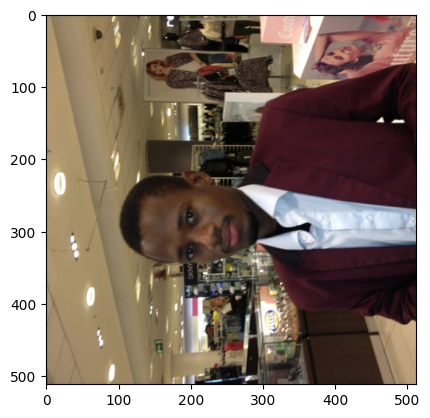

In [26]:
sanka_img = plt.imread('images/Sanka_img.jpg') # load image
plt.imshow(sanka_img) # display image

In [49]:
# info about the image
print(type(sanka_img))
print(sanka_img.shape)
print(sanka_img.size)

<class 'numpy.ndarray'>
(512, 512, 3)
786432


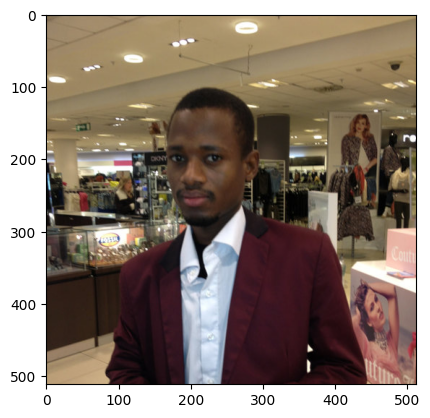

In [31]:
# Image filter: rotation
sanka_img0 = np.rot90(sanka_img, k=-1)
plt.imshow(sanka_img0)

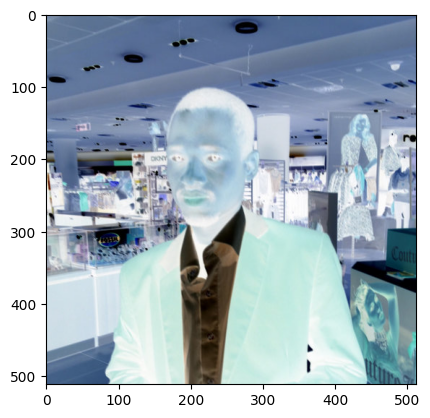

In [32]:
# Image filter: negative
sanka_img_neg = 255 - sanka_img0
plt.imshow(sanka_img_neg)

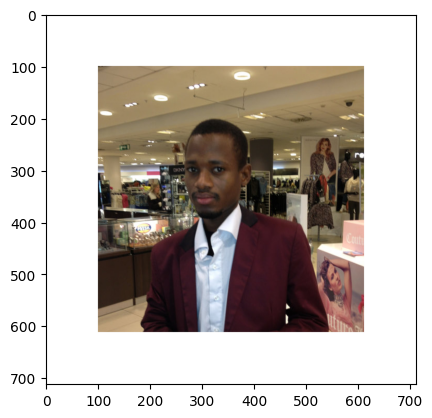

In [36]:
# Image padding
# padding np.pad(array, ((top, bottom), (left, right)), mode, values)
sanka_img_pad = np.pad(sanka_img0, ((100,100), (100,100), (0,0)), mode='constant', constant_values=[255,255])
plt.imshow(sanka_img_pad)

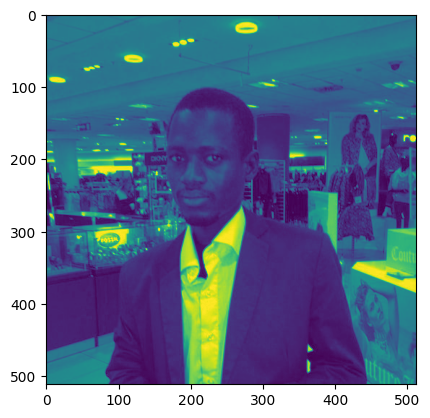

In [54]:
# Color components in image
red = sanka_img0[:,:,0]
green = sanka_img0[:,:,1] 
blue = sanka_img0[:,:,2]
plt.imshow(red)

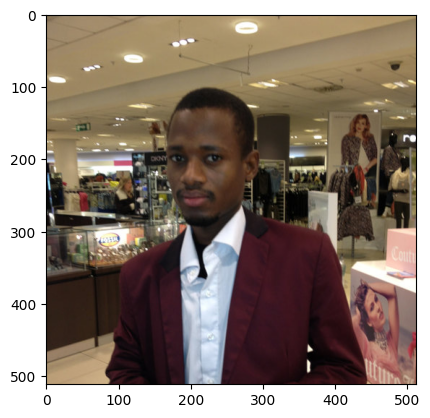

In [55]:
# Recover the original image by dstack
rgb_image = np.dstack((red, green, blue)) # joins the image together by color channel (third axis)
plt.imshow(rgb_image)

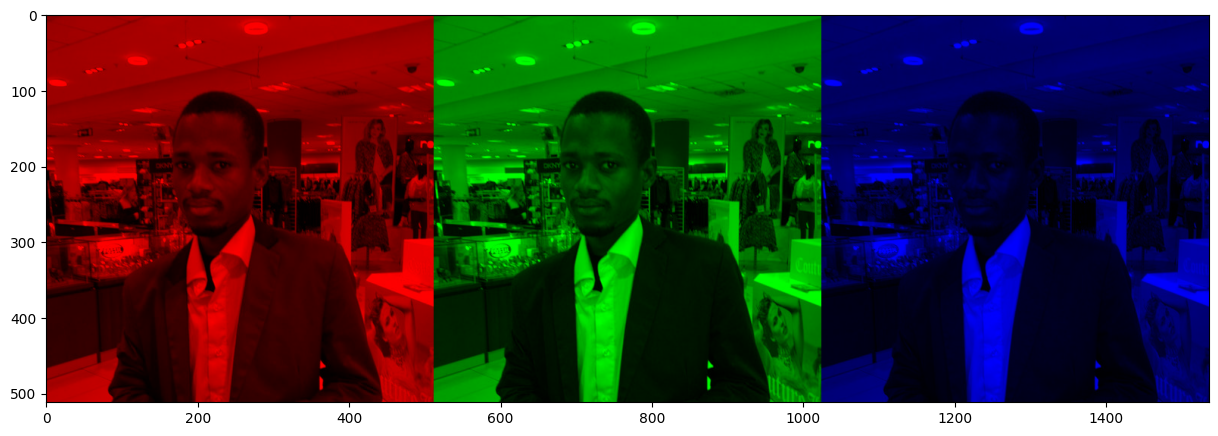

In [56]:
# Red, green, blue parts of image displayed
# Setting other color channels to 0
red, green, blue = sanka_img0.copy(), sanka_img0.copy(), sanka_img0.copy()
red[:, :, (1, 2)] = 0
green[:, :, (0, 2)] = 0
blue[:, :, (0, 1)] = 0

img_rgb = np.concatenate((red,green,blue), axis=1) # join images horizontally
plt.figure(figsize=(15, 15)) # idk wtf this does but something about display size
plt.imshow(img_rgb)

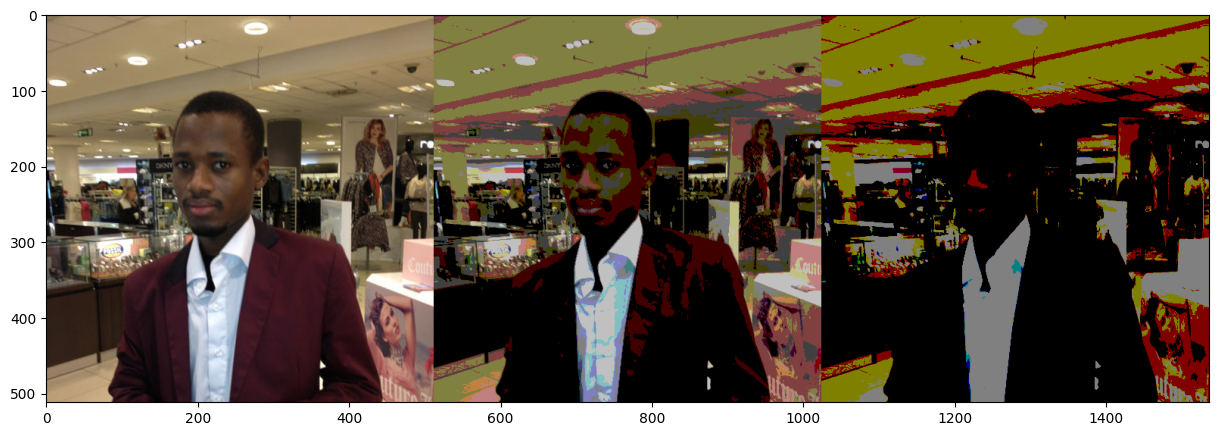

In [58]:
# Image filter: color reduction
img_0 = (sanka_img0 // 64) * 64
img_1 = (sanka_img0 // 128) * 128
img_all = np.concatenate((sanka_img0, img_0, img_1), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_all)

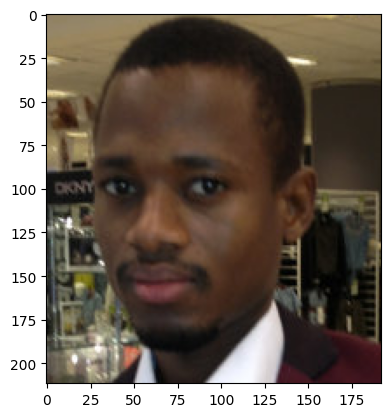

In [63]:
# Trimming an image
img_trim = sanka_img0[100:-200, 140:-180, :] # basically just slicing array
plt.imshow(img_trim)
#im_0, im_1 = np.vsplit(sanka_img0, 2)
#img_all = np.concatenate((im_0, im_1), axis=1)
#plt.figure(figsize=(15, 15))
#plt.imshow(im_1)

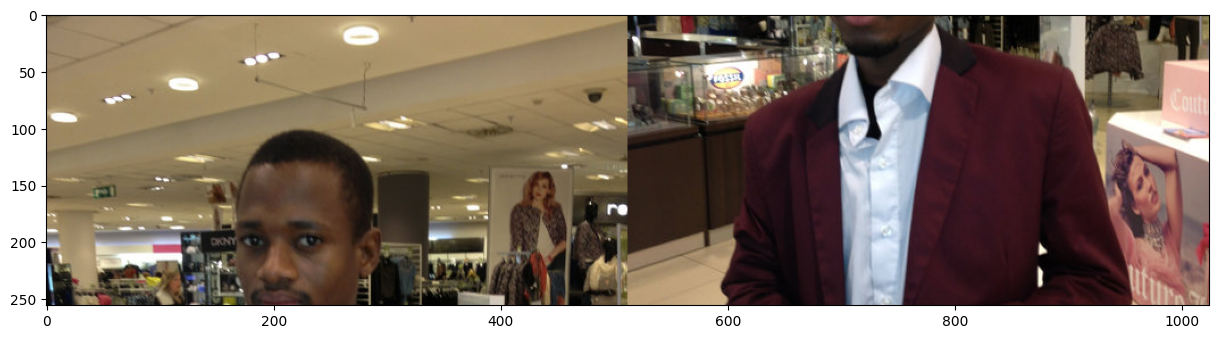

In [70]:
im_0, im_1 = np.vsplit(sanka_img0, 2) # split the array into 2 equal new arrays (split by rows)
img_all = np.concatenate((im_0, im_1), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_all)

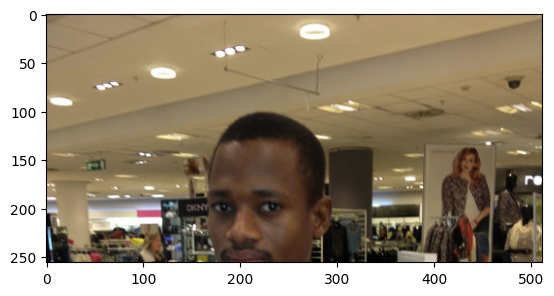

In [65]:
# Resize image: np.resize(a, new_shape)
img_resize = np.resize(sanka_img0, (256,512,3))

plt.imshow(img_resize)

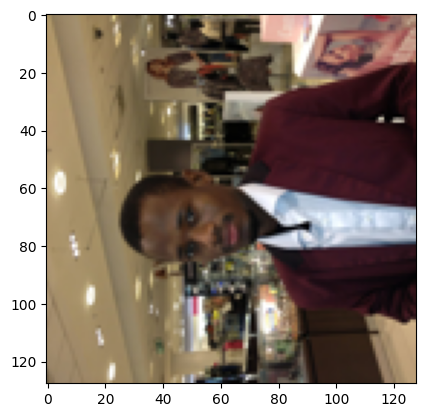

In [72]:
# resizing while opening an image
src = np.asarray(Image.open('images/Sanka_img.jpg').resize((128, 128)))
plt.imshow(src)
#dst = np.array(Image.open('emma_stone.jpg').resize((256, 256))) // 4

(128, 128, 3)

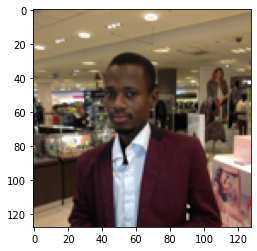

In [21]:
src1=np.rot90(src,k=-1)
plt.imshow(src1)
src1.shape

Text(0.5, 1.0, 'Pasted with slice')

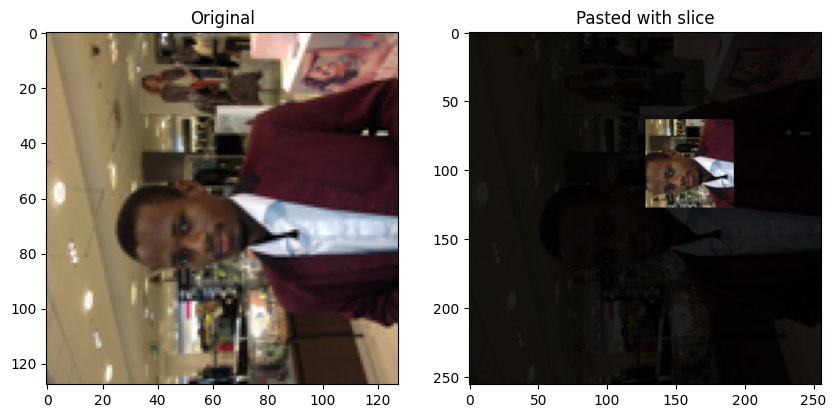

In [76]:
# Paste a slice of resized image onto original image
src = np.array(Image.open('images/Sanka_img.jpg').resize((128, 128)))
dst = np.array(Image.open('images/Sanka_img.jpg').resize((256, 256))) // 8 # make background blacker with // 8
dst_copy = dst.copy()
dst_copy[64:128, 128:192] = src[32:96, 32:96] # set 64x64 square to resized image
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1) # nrows of grid, ncols of grid, index of grid
plt.imshow(src)
plt.title('Original')
fig.add_subplot(1, 2, 2)
plt.imshow(dst_copy)
plt.title('Pasted with slice')

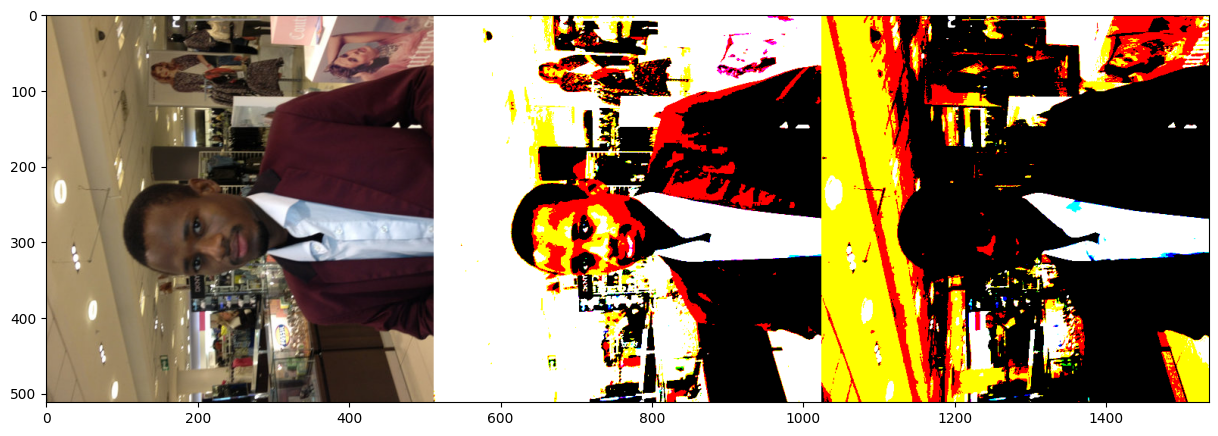

In [78]:
# Image filter: binarization
img = np.array(Image.open('images/Sanka_img.jpg'))
img_64 = (img > 64) * 255 # if RGB value > 64, set to 255, vice versa set to 0
img_128 = (img > 128) * 255
fig = plt.figure(figsize=(15, 15))
img_all = np.concatenate((img, img_64, img_128), axis=1)
plt.imshow(img_all)

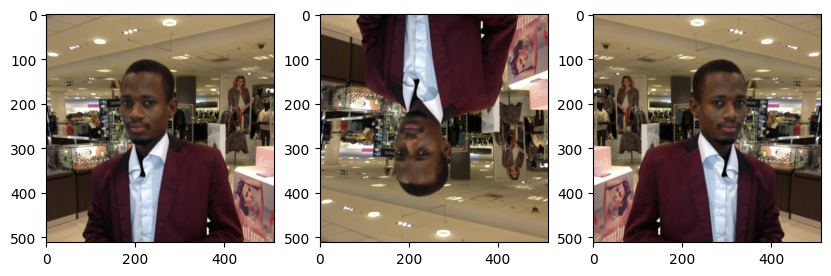

In [82]:
# Image filter: flip
img = np.array(Image.open('images/Sanka_img.jpg'))
img = np.rot90(img, k=-1)
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(img)
fig.add_subplot(1, 3, 2)
plt.imshow(np.flipud(img))
fig.add_subplot(1, 3, 3)
plt.imshow(np.fliplr(img))

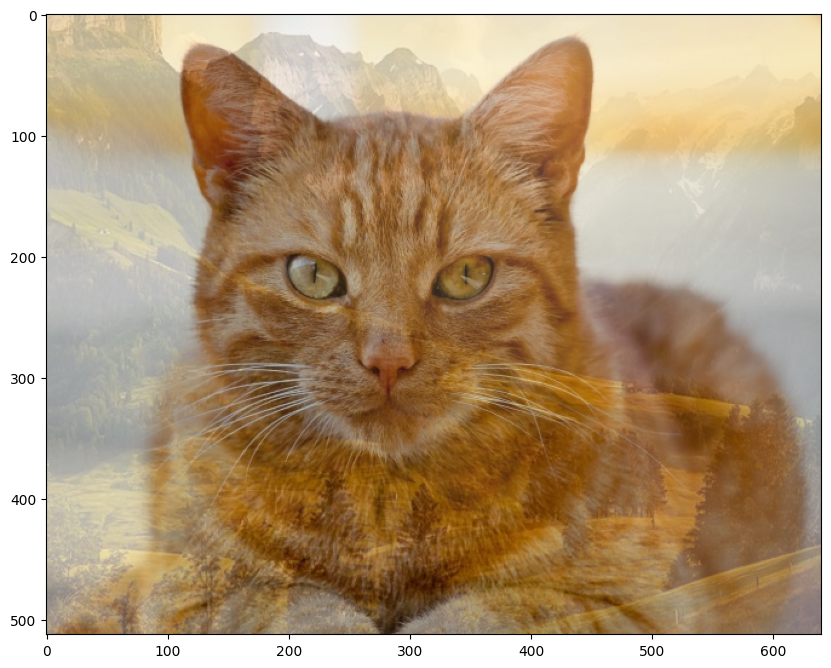

In [86]:
# Image filter: color blending
img = np.array(Image.open('images/cat.jpg'))
img0 = np.array(Image.open('images/mountain.jpg').resize(img.shape[1::-1])) # Resizing to fit cat image
img_blend = (img * 0.7 + img0 * 0.3).astype(np.uint8) # Blending them in with different weights for each image
plt.figure(figsize=(10, 10))
plt.imshow(img_blend)

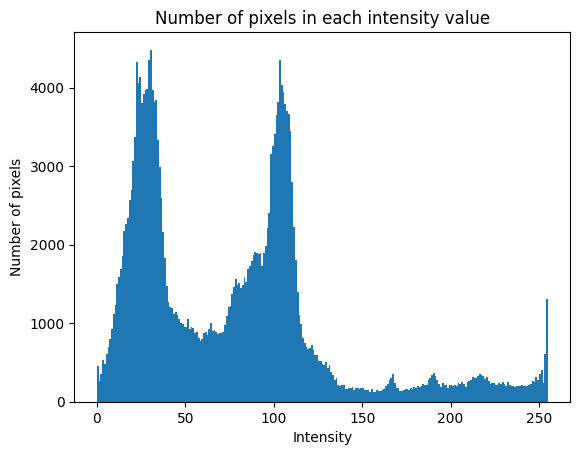

In [90]:
img = np.array(Image.open('images/Sanka_img.jpg'))
red_img = img[:,:,2] # only keep red part of RGB value for each pixel
plt.hist(red_img.flatten(), bins=range(256)) # flatten turns array into 1D, bins sorts each value into [0, 1], [1, 2], etc.

plt.title("Number of pixels in each intensity value")
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")
plt.show()